In [13]:
# Data Handling
import numpy as np
import pandas as pd

# Vizz
import matplotlib.pyplot as plt
import missingno as msno
from matplotlib.cm import ScalarMappable
import seaborn as sns

# Transformations
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from scipy.spatial.distance import cdist
from sklearn.metrics import mean_absolute_error

In [14]:
def r2(y_real, y_pred):
    RSS = np.sum(np.power(y_pred - y_real, 2))
    TSS = np.sum(np.power(y_real - np.mean(y_real), 2))
    
    return TSS, 1-RSS/TSS

def q2(y_real, y_pred, TSS):
    PRESS = np.sum(np.power(y_pred - y_real, 2))
    
    return 1-PRESS/TSS

# Reading Data

In [15]:
data_path = '../data/' # ./data or ../data

In [16]:
part_1 = pd.read_csv(data_path+'data_part_1.csv', index_col=False); part_1 = part_1[part_1.columns[1:]] # Getting rid of idx col
part_2 = pd.read_csv(data_path+'data_part_2.csv', index_col=False); part_2 = part_2[part_2.columns[1:]] # Getting rid of idx col

# Joining datasets

In [17]:
data_df=pd.concat([part_1, part_2], axis=0,join="inner")

# Create a dataset without missing values for each trait + List of those data

In [18]:
# We have 20 target variables and so, we split the data into 20 different dataframes for each target variable. 
# After that, we drop the rows with missing values in the target variable and then, we drop the target variable from the dataframes.
# We are left with 20 dataframes with no missing values in the target variable.
# Now, we create a list of target variables and a list of input variables.
input_cols = data_df.columns[20:]
target_cols = data_df.columns[:20]
y=[]
x=[]
for i in range(20):
    y.append(data_df.iloc[:,i].dropna(axis=0))
    x_temp=data_df.iloc[y[i].index,20:]
    x.append(x_temp)

## Train, Validation, and Test split of the list of the data

In [19]:
# We now split the list of input variables and target variables into train, test and validation sets.
# So, we will have a list of 20 train sets, 20 test sets and 20 validation sets.
train_xl = []
train_yl = []
test_xl = []
test_yl = []
val_xl = []
val_yl = []
for X_matrix, y_target in zip(x, y):
    X_train, X_temp, y_train, y_temp = train_test_split(X_matrix, y_target, test_size=0.3, random_state=42,shuffle=True)
    X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    train_xl.append((X_train))
    train_yl.append((y_train))
    test_xl.append((X_test))
    test_yl.append((y_test))
    val_xl.append((X_validation))
    val_yl.append((y_validation))

## Normalization of the train, validation, and test data list

In [20]:
X_train_scaled=[]
X_test_scaled=[]
X_val_scaled=[]

for i in range(20):
# Z-score (STD) normalization
    scaler = StandardScaler()
    X_train_scaled_temp = scaler.fit_transform(train_xl[i])
    X_test_scaled_temp = scaler.transform(test_xl[i])
    X_val_scaled_temp = scaler.transform(val_xl[i])
    X_train_scaled.append(X_train_scaled_temp)
    X_test_scaled.append(X_test_scaled_temp)
    X_val_scaled.append(X_val_scaled_temp)

# MLR

In [21]:
predictions_MLR = []

mse_train_list = []
mse_val_list = []
r2_train_list = []
q2_MLR = []

# Loop through each target column
for trait in range(len(target_cols)):
    X_train = X_train_scaled[trait]
    y_train = train_yl[trait]
    X_test = X_test_scaled[trait]
    y_test = test_yl[trait]
    
    # Train the MLR model
    mlr = LinearRegression()
    mlr.fit(X_train, y_train)

    # Make predictions using the model
    y_train_pred = mlr.predict(X_train)
    y_val_pred = mlr.predict(X_test) 
    
    predictions_MLR.append(y_val_pred)

    # Calculate performance metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_val = mean_squared_error(y_test, y_val_pred) 
    tss, r2_train = r2(y_train, y_train_pred)
    q2_val = q2(y_test, y_val_pred, tss) 

    mse_train_list.append(mse_train)
    mse_val_list.append(mse_val)
    r2_train_list.append(r2_train)
    q2_MLR.append(q2_val)

# Print out the performance metrics for each target
for i, target in enumerate(target_cols):
    print(f"Target: {target}")
    print(f"Train MSE: {mse_train_list[i]:.4f} | Validation MSE: {mse_val_list[i]:.4f}")
    print(f"Train R^2: {r2_train_list[i]:.4f} | Validation Q^2: {q2_MLR[i]:.4f}")
    print("-" * 50)

Target: Anthocyanin content (μg/cm²)
Train MSE: 0.0144 | Validation MSE: 19.7874
Train R^2: 0.9216 | Validation Q^2: -22.1727
--------------------------------------------------
Target: Boron content (mg/cm²)
Train MSE: 0.0000 | Validation MSE: 459053.9127
Train R^2: 0.9906 | Validation Q^2: -1320719364664.8826
--------------------------------------------------
Target: C content (mg/cm²)
Train MSE: 0.3081 | Validation MSE: 4472894421.2815
Train R^2: 0.9873 | Validation Q^2: -39513790.8174
--------------------------------------------------
Target: Ca content (mg/cm²)
Train MSE: 0.0001 | Validation MSE: 891451989.8444
Train R^2: 0.9915 | Validation Q^2: -19537695440.8826
--------------------------------------------------
Target: Carotenoid content (μg/cm²)
Train MSE: 0.2670 | Validation MSE: 24953122287.2876
Train R^2: 0.9680 | Validation Q^2: -640900420.7986
--------------------------------------------------
Target: Cellulose (mg/cm²)
Train MSE: 0.0276 | Validation MSE: 2905965418129.133

# PCR

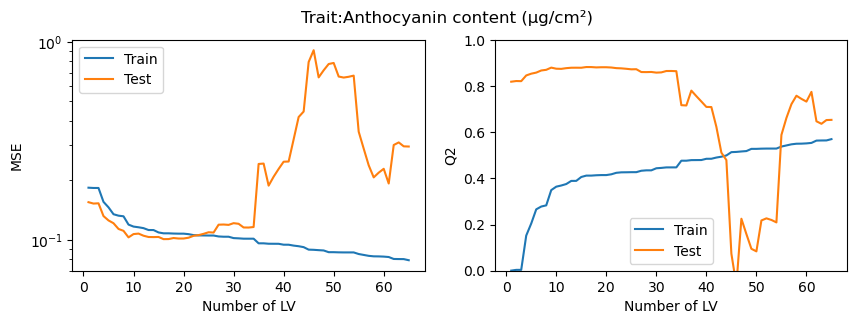

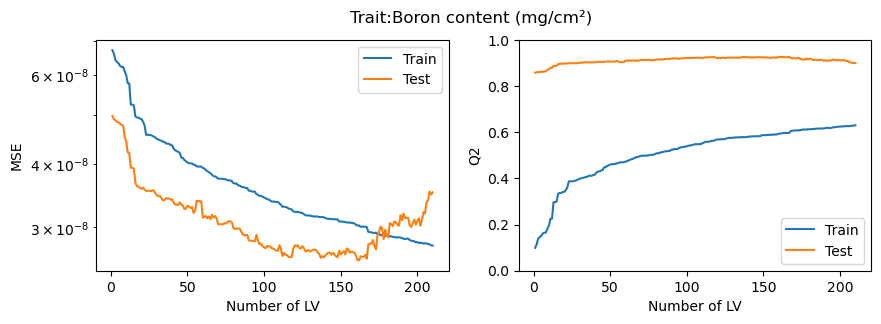

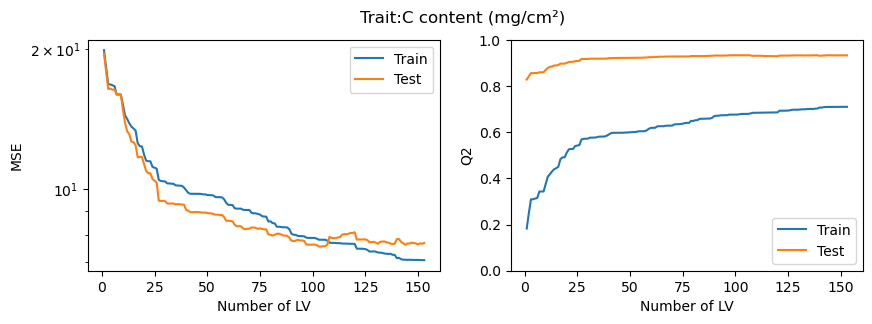

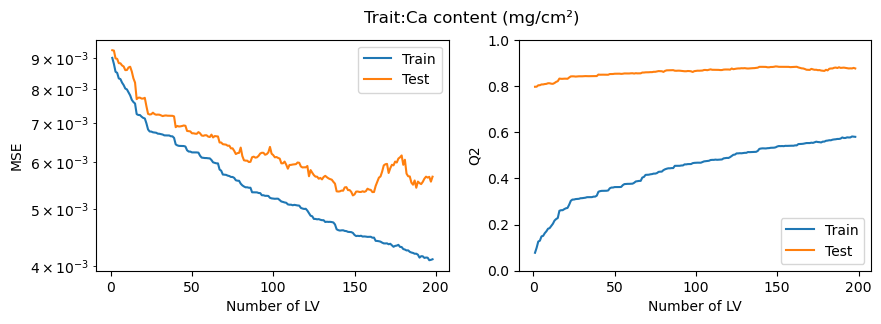

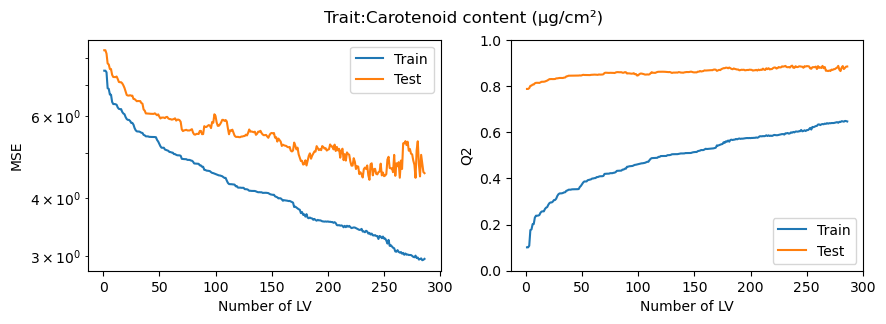

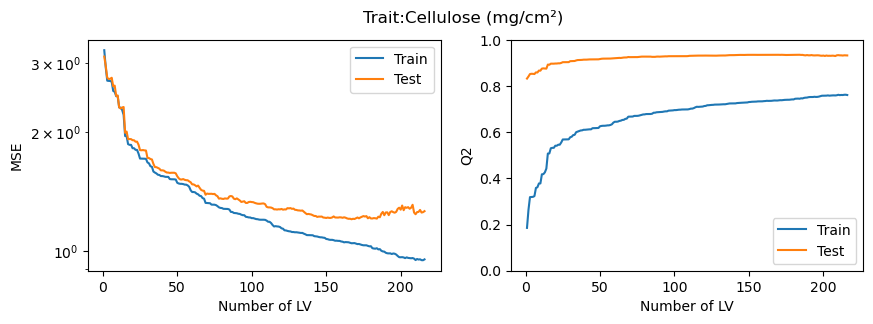

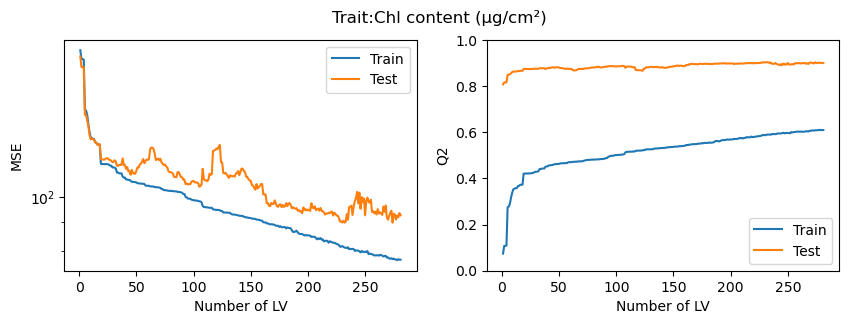

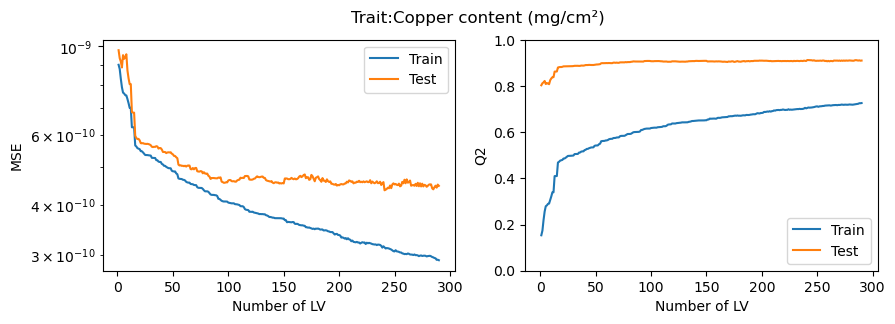

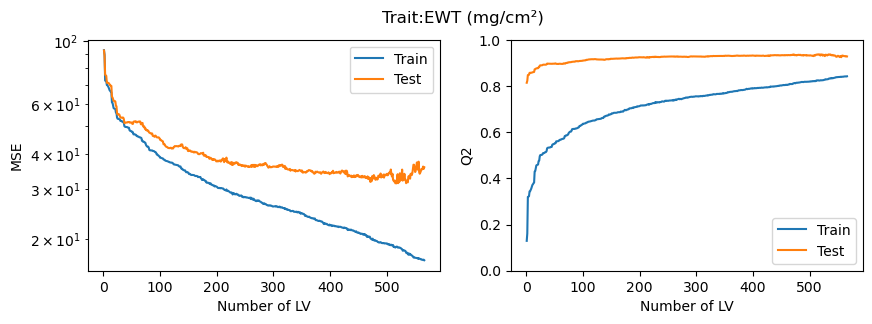

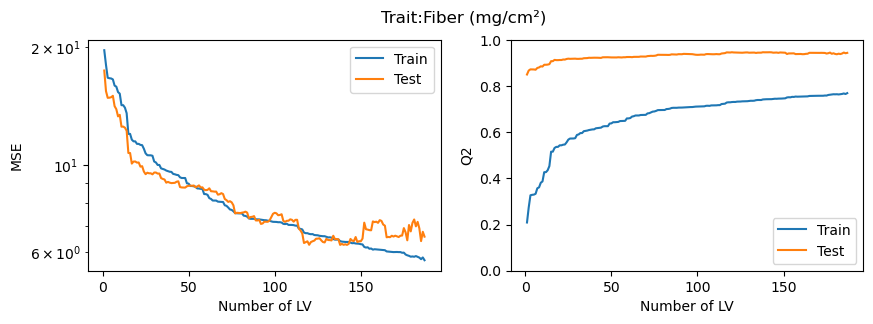

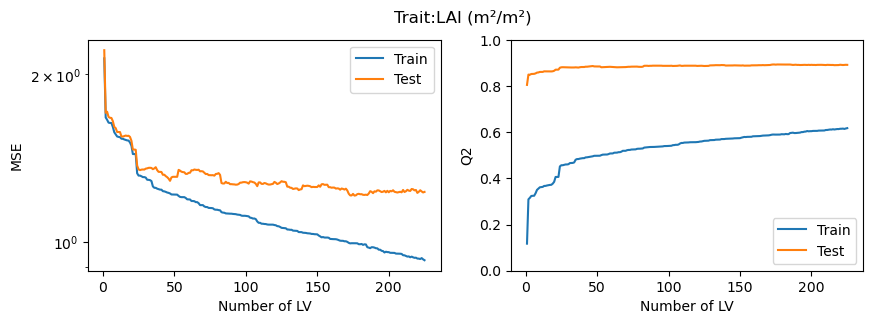

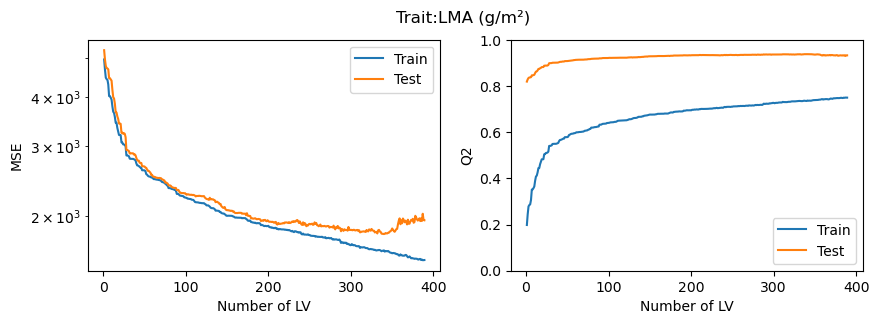

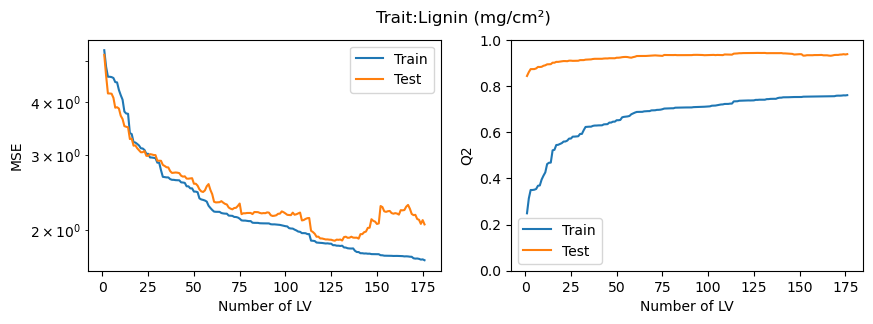

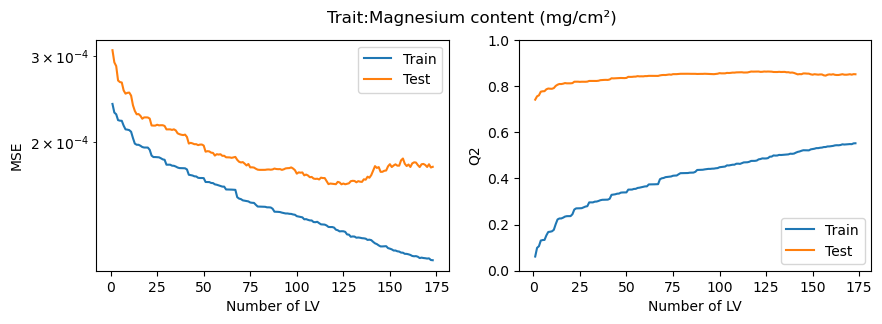

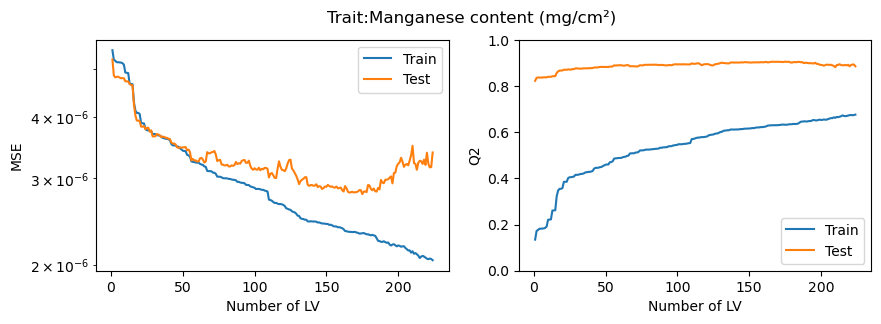

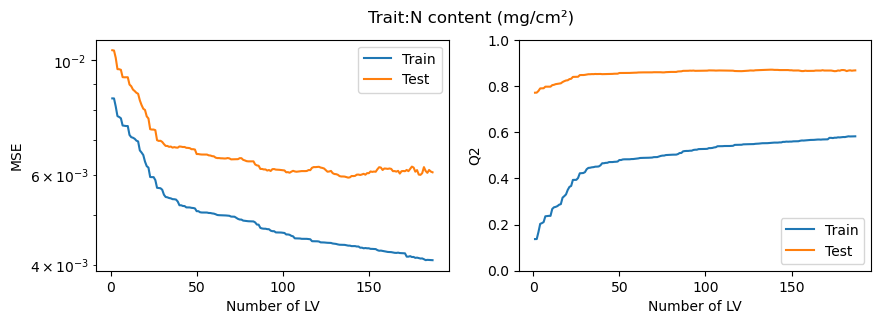

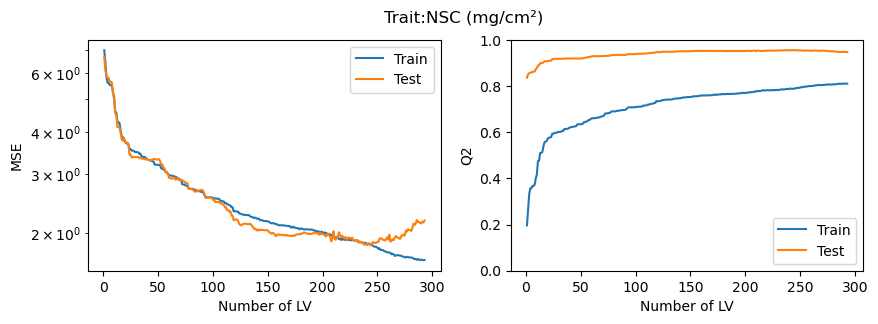

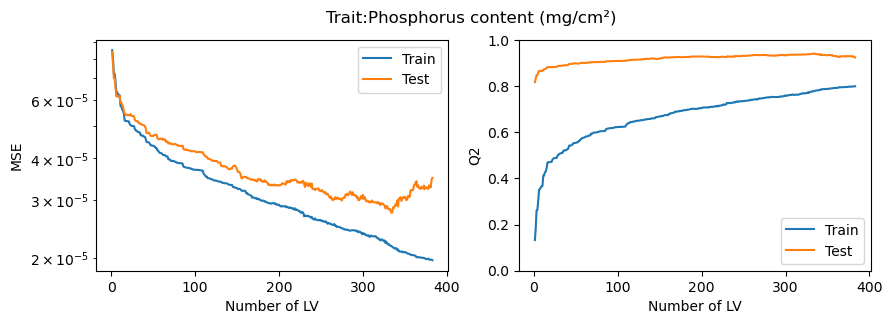

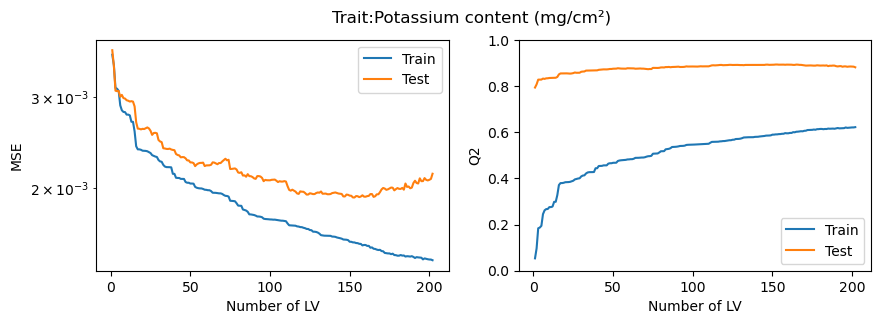

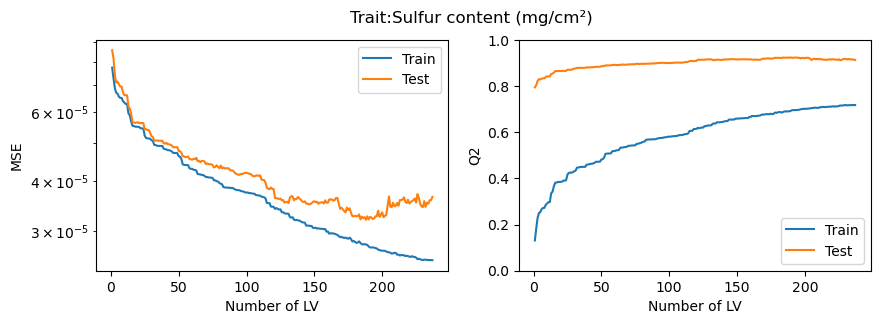

In [22]:
# For PCR

# We will be using a maximum of 100 latent variables as we have seen that with only two we already
# reach a high percentage
optimal_components = np.zeros(len(target_cols))


for trait in range(len(target_cols)): # For a single trait
    X_train = X_train_scaled[trait]
    y_train = train_yl[trait]
    X_test = X_val_scaled[trait]
    y_test = val_yl[trait]
    
    train_mse = []
    test_mse = []
    train_q2 = []
    test_q2 = []
    LV_vals = np.arange(1, min(X_train.shape[0], X_train.shape[1])) 

    for comp in LV_vals: # For a single Latent variable
        pca = PCA(n_components = comp)
        T = pd.DataFrame(pca.fit_transform(X_train))
        reg = LinearRegression().fit(T, y_train)

        y_est_pcr_train = reg.predict(T)
        y_est_pcr_test = reg.predict(pca.transform(X_test))

        train_mse.append(mean_squared_error(y_train, y_est_pcr_train))
        test_mse.append(mean_squared_error(y_test, y_est_pcr_test))

        tss, r2_score = r2(y_train, y_est_pcr_train)
        train_q2.append(r2_score)
        test_q2.append(q2(y_test, y_est_pcr_test, tss))
        
        if comp > 50: # Implementing early stopping of 50
            for mse in test_mse[comp-49:]:
                if test_mse[comp-50] > mse:
                    break
            else:
                LV_vals = np.arange(1, comp+1)
                optimal_components[trait] = comp-50
                break

    if optimal_components[trait] == 0:
        optimal_components[trait] = comp
        
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax[0].plot(LV_vals, train_mse, label = 'Train')
    ax[0].plot(LV_vals, test_mse, label = 'Test')
    ax[0].set_xlabel("Number of LV")
    ax[0].set_ylabel("MSE")
    ax[0].set_yscale('log')
    ax[0].legend()

    ax[1].plot(LV_vals, train_q2, label = 'Train')
    ax[1].plot(LV_vals, test_q2, label = 'Test')
    ax[1].set_xlabel("Number of LV")
    ax[1].set_ylabel("Q2")
    ax[1].set_ylim(0, 1)
    ax[1].legend()
    plt.suptitle("Trait:"+target_cols[trait])
    plt.show()

In [23]:
# Predicting on X_Test
predictions_PCR = []
q2_PCR = []

for trait, comp in zip(range(len(target_cols)), optimal_components): # For a single trait
    X_train = X_train_scaled[trait]
    y_train = train_yl[trait]
    X_test = X_test_scaled[trait]
    y_test = test_yl[trait]
    
    pca = PCA(n_components = int(comp))
    T = pd.DataFrame(pca.fit_transform(X_train))
    reg = LinearRegression().fit(T, y_train)

    y_pred_test = reg.predict(pca.transform(X_test))
    y_pred_train = reg.predict(pca.transform(X_train))
    
    tss = np.sum(np.power(y_train - np.mean(y_train), 2))
    q2_PCR.append(q2(y_test, y_pred_test, tss))
    predictions_PCR.append(y_pred_test)

# PLS

In [ ]:
# Since it takes a long time to run the PLS, we have saved the optimal number of components for each trait in a list.

# CV_PLS=[]
# n_components_optimal=[]
# y_train_pls=[]
# y_val_pls=[]
# for i in range(20):
#     y_train_pls.append(train_yl[i]-np.mean(train_yl[i]))
#     y_val_pls.append(val_yl[i]-np.mean(val_yl[i]))

# for i in range(20):
#     r2_val=[]
#     for j in range(120):
#         pls = PLSRegression(n_components=j+1)
#         pls.fit(X_train_scaled[i],y_train_pls[i])
#         y_pred = pls.predict(X_val_scaled[i])
#         tss = np.sum((y_train_pls[i]- np.mean(y_train_pls[i]))**2)
#         val_y=np.reshape(y_val_pls[i],(-1,1))
#         press = np.sum((val_y-y_pred)**2)
#         cv_pls=1-press/tss
#         CV_PLS.append(cv_pls)

#     n_components_optimal.append(np.argmax(CV_PLS)+1)

In [24]:
num_components=[7, 49, 75, 78, 70, 59, 75, 77, 76, 55, 79, 74, 73, 75, 80, 80, 61, 79, 58, 60]
# Found using grid search maximizing Q2
r2_PLS=[]
q2_PLS=[]
ypred_PLS=[]
y_train_pls=[]
y_test_pls=[]

for i in range(20):
    y_train_pls.append(train_yl[i]-np.mean(train_yl[i]))
    y_test_pls.append(test_yl[i]-np.mean(test_yl[i]))


for i in range(20):
    pls=PLSRegression(n_components=num_components[i])
    pls.fit(X_train_scaled[i],y_train_pls[i])
    y_hat = pls.predict(X_train_scaled[i])

    y_pred=pls.predict(X_test_scaled[i])
    ypred_PLS.append(y_pred)
    
    # Calculate TSS
    tss = np.sum(( y_train_pls[i] - np.mean( y_train_pls[i]))**2)

    # Calculate R2 
    train_y=np.reshape( y_train_pls[i],(-1,1))
    rss = np.sum((train_y- y_hat)**2)
    r2_pls = 1-rss/tss
    r2_PLS.append(r2_pls)

    # Calculate Q2
    test_y=np.reshape(y_test_pls[i],(-1,1))
    press=np.sum((test_y -y_pred)**2)
    q2_pls=1-press/tss
    q2_PLS.append(q2_pls)

predictions_PLS = ypred_PLS

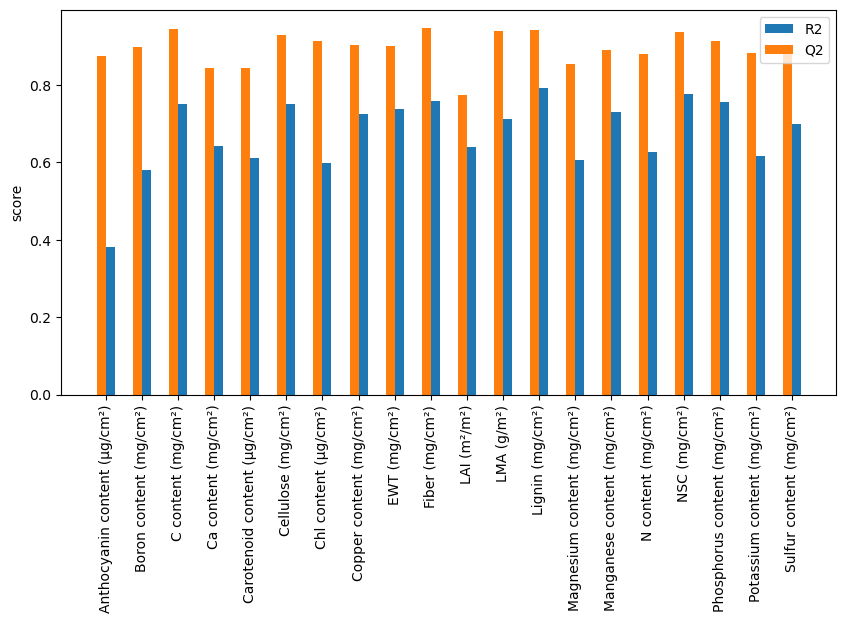

In [25]:
plt.figure(figsize=(10,5))

plt.bar(np.arange(len(r2_PLS))*2 + 0.25, r2_PLS, width = 0.5, label='R2')
plt.bar(np.arange(len(r2_PLS))*2 - 0.25, q2_PLS, width = 0.5, label='Q2')

plt.xticks(np.arange(len(r2_PLS))*2, target_cols, rotation=90)
plt.ylabel("score")
plt.legend()
plt.show()

# KPLS

In [ ]:
# Since it takes a long time to run the KPLS, we have saved the optimal standard deviation for each trait in a list.

# ypred_KPLS=[]
# CV_KPLS=[]
# sigma_optimal=[]
# for i in range(20):
#     KCal=[]
#     KVal=[]
#     cv_r2_values = []
#     for sigma in np.arange(0.1, 5, 0.5):

#         KCal = np.exp(-cdist(X_train_scaled[i], X_train_scaled[i], 'euclidean')**2 / (2 * sigma**2))
#         KVal = np.exp(-cdist(X_val_scaled[i], X_train_scaled[i], 'euclidean')**2 / (2 * sigma**2))
#         # Center the calibration kernel matrix
#         nl = KCal.shape[0]
#         oneN = np.ones((nl, nl)) / nl
#         KCal = KCal - oneN @ KCal - KCal @ oneN + oneN @ KCal @ oneN

#         n = KCal.shape[0]
#         oneN = np.ones((n, n)) / n
#         nVal = KVal.shape[0]
#         oneNVal = np.ones((nVal, n)) / n
#         KVal = KVal - oneNVal @ KCal - KVal @ oneN + oneNVal @ KCal @ oneN

#         # Perform K-PLS regression using the calibration data
#         pls = PLSRegression(n_components=num_components[i])
#         pls.fit(KCal, train_yl[i])
#         tss = np.sum((train_yl[i] - np.mean(train_yl[i]))**2)
#         Ypred = pls.predict(KVal)

#         val_y=np.reshape(val_yl[i],(-1,1))
#         press = np.sum((val_y-Ypred)**2)
#         cv_kpls=1-press/tss
#         CV_KPLS.append(cv_kpls)
#     sigma_optimal.append(np.argmax(CV_KPLS)*0.5+0.1)

In [26]:
num_components=[7, 49, 75, 78, 70, 59, 75, 77, 76, 55, 79, 74, 73, 75, 80, 80, 61, 79, 58, 60]
sigma =[4.6, 3.1, 3.1, 4.1, 2.1, 4.6, 1.6, 4.6, 4.6, 4.1, 4.1, 3.6, 4.6, 4.6, 4.6, 3.1, 4.6, 4.6, 2.1, 4.1]
ypred_KPLS=[]
r2_KPLS=[]
q2_KPLS=[]
for i in range(20):
# Calculate the Gaussian kernel matrices for calibration and test data
    KCal = np.exp(-cdist(X_train_scaled[i], X_train_scaled[i], 'euclidean')*2 / (2 * sigma[i]*2))
    KTest = np.exp(-cdist(X_test_scaled[i], X_train_scaled[i], 'euclidean')*2 / (2 * sigma[i]*2))

    # Center the calibration kernel matrix
    nl = KCal.shape[0]
    oneN = np.ones((nl, nl)) / nl
    KCal_c = KCal - oneN @ KCal - KCal @ oneN + oneN @ KCal @ oneN

    n = KCal.shape[0]
    oneN = np.ones((n, n))/n
    nTest = KTest.shape[0]
    oneNTest = np.ones((nTest, n)) / n
    KTest_c = KTest - oneNTest @ KCal - KTest @ oneN + oneNTest @ KCal @ oneN

    # Perform K-PLS regression using the calibration data
    pls = PLSRegression(n_components=num_components[i])
    pls.fit(KCal_c, train_yl[i])
    y_hat = pls.predict(KCal_c)
    y_pred = pls.predict(KTest_c)
    ypred_KPLS.append(y_pred)
    
    tss = np.sum((train_yl[i] - np.mean(train_yl[i]))**2)

    # Calculate R2
    train_y=np.reshape(train_yl[i],(-1,1))
    rss = np.sum((train_y- y_hat)**2)
    r2_kpls=1-rss/tss
    r2_KPLS.append(r2_kpls)

    # Calculate Q2
    test_y=np.reshape(test_yl[i],(-1,1))
    press = np.sum((test_y-y_pred)**2)
    q2_kpls=1-press/tss
    q2_KPLS.append(q2_kpls)

predictions_KPLS = ypred_KPLS

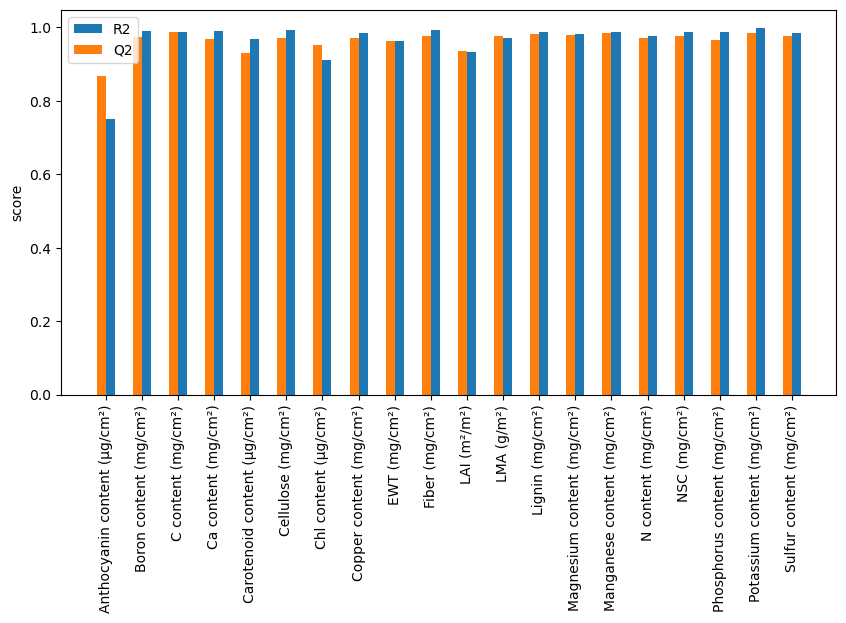

In [27]:
plt.figure(figsize=(10,5))

plt.bar(np.arange(len(r2_KPLS))*2 + 0.25, r2_KPLS, width = 0.5, label='R2')
plt.bar(np.arange(len(r2_KPLS))*2 - 0.25, q2_KPLS, width = 0.5, label='Q2')

plt.xticks(np.arange(len(r2_KPLS))*2, target_cols, rotation=90)
plt.ylabel("score")
plt.legend()
plt.show()

# Comparing the models

In [28]:
# Compare the predictions with different metrics
mse_arr = []
r2_arr = []
mae_arr = []

# predictions_PCR, predictions_KPLS, predictions_MLR, predictions_PLS

for trait in range(len(target_cols)):
    mse_MLR = mean_squared_error(test_yl[trait], predictions_MLR[trait])
    mse_PCR = mean_squared_error(test_yl[trait], predictions_PCR[trait])
    mse_PLS = mean_squared_error(test_yl[trait], predictions_PLS[trait])
    mse_KPLS = mean_squared_error(test_yl[trait], predictions_KPLS[trait])
    
    mse_arr.append([mse_MLR, mse_PCR, mse_PLS, mse_KPLS])
    
    
    mae_MLR = mean_absolute_error(test_yl[trait], predictions_MLR[trait])
    mae_PCR = mean_absolute_error(test_yl[trait], predictions_PCR[trait])
    mae_PLS = mean_absolute_error(test_yl[trait], predictions_PLS[trait])
    mae_KPLS = mean_absolute_error(test_yl[trait], predictions_KPLS[trait])
    
    mae_arr.append([mae_MLR, mae_PCR, mae_PLS, mae_KPLS])

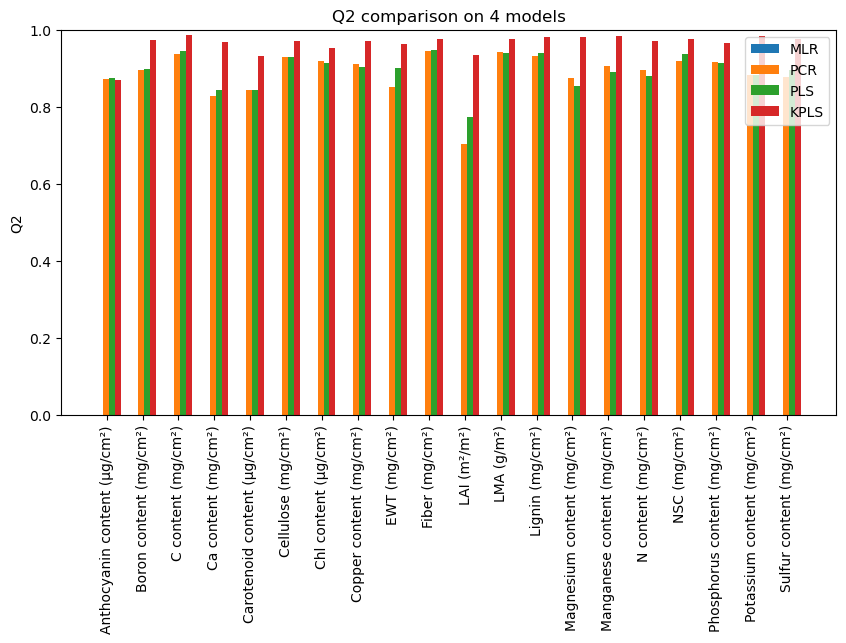

In [41]:
# Plotting the results
x_arr = np.arange(0, len(target_cols)*3, 3)

plt.subplots(figsize=(10, 5))

plt.bar(x_arr-0.6, q2_MLR, width = 0.5, label = 'MLR')
plt.bar(x_arr-0.1, q2_PCR, width = 0.5, label = 'PCR')
plt.bar(x_arr+0.4, q2_PLS, width = 0.5, label = 'PLS')
plt.bar(x_arr+0.9, q2_KPLS, width = 0.5, label = 'KPLS')

plt.xticks(np.arange(0, len(target_cols)*3, 3), target_cols, rotation=90)
plt.ylim(0, 1)
plt.legend()
plt.title("Q2 comparison on 4 models")
plt.ylabel("Q2")
plt.show()

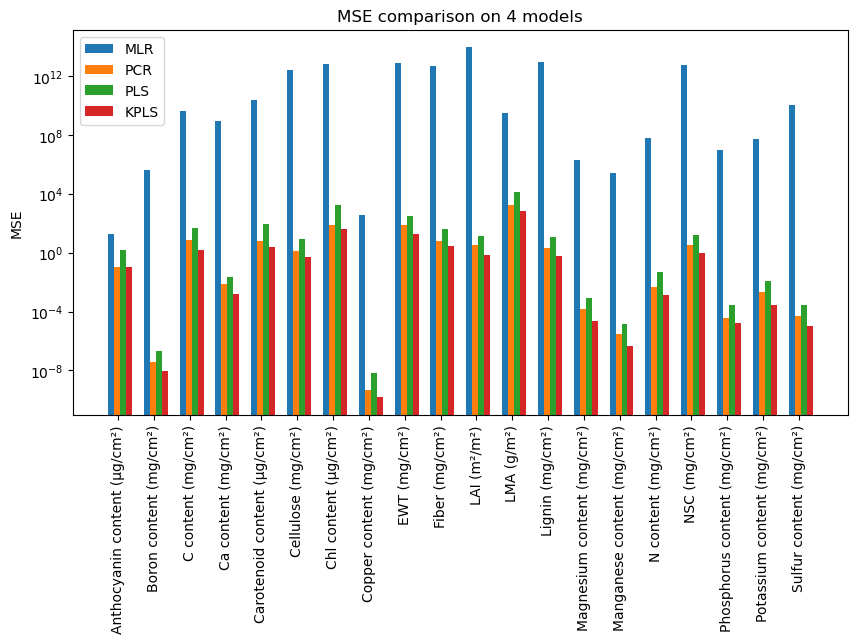

In [42]:
x_arr = np.array([[x-0.6, x-0.1, x+0.4, x+0.9] for x in np.arange(0, len(target_cols)*3, 3)])

plt.subplots(figsize=(10, 5))
for i in range(4):
    plt.bar(x_arr[:, i], np.array(mse_arr)[:,i], width = 0.5, label = models[i])

plt.xticks(np.arange(0, len(target_cols)*3, 3), target_cols, rotation=90)
plt.legend()
plt.title("MSE comparison on 4 models")
plt.ylabel("MSE")
plt.yscale('log')
plt.show()

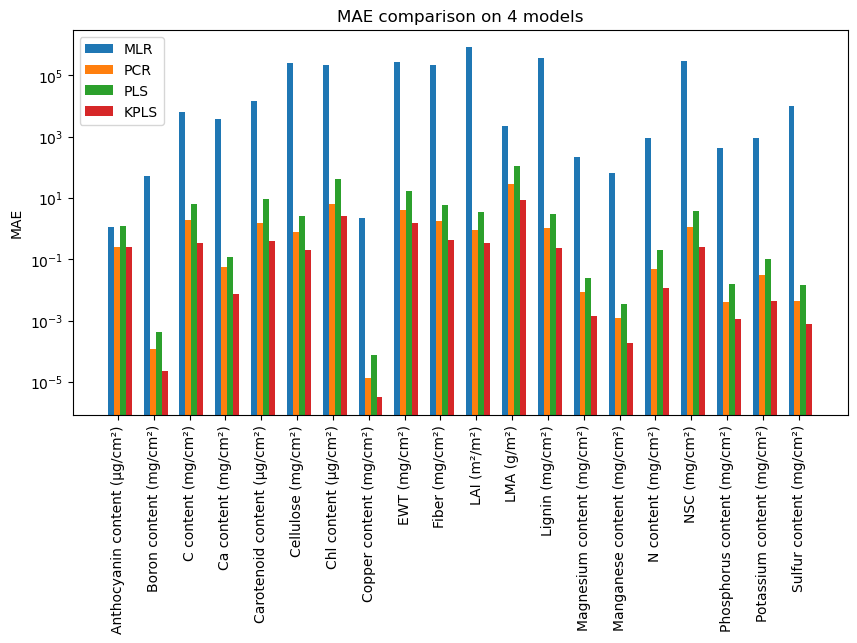

In [43]:
plt.subplots(figsize=(10, 5))
for i in range(4):
    plt.bar(x_arr[:, i], np.array(mae_arr)[:,i], width = 0.5, label = models[i])

plt.xticks(np.arange(0, len(target_cols)*3, 3), target_cols, rotation=90)
plt.legend()
plt.ylabel("MAE")
plt.yscale('log')
plt.title("MAE comparison on 4 models")
plt.show()

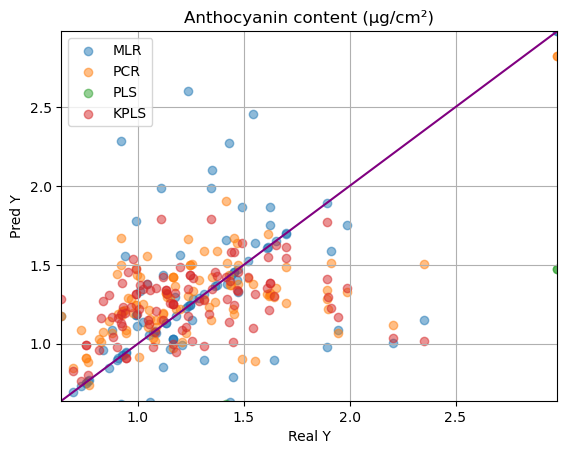

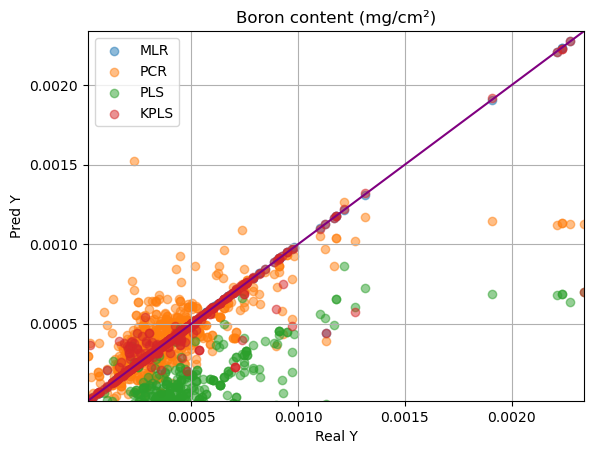

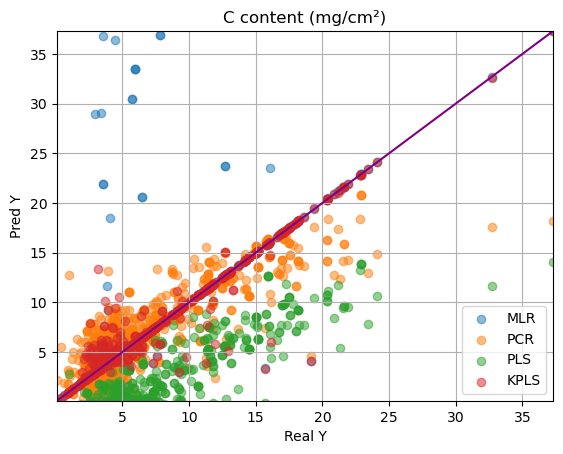

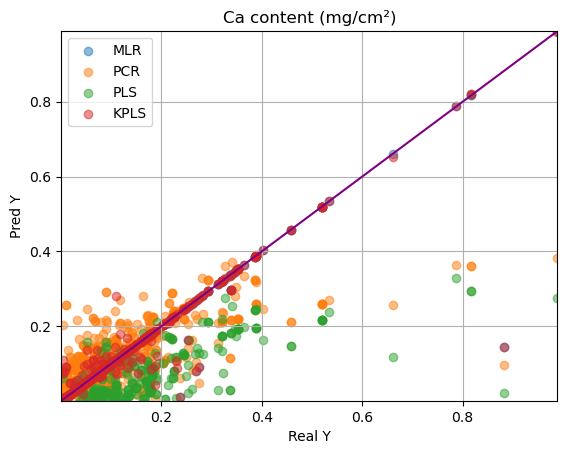

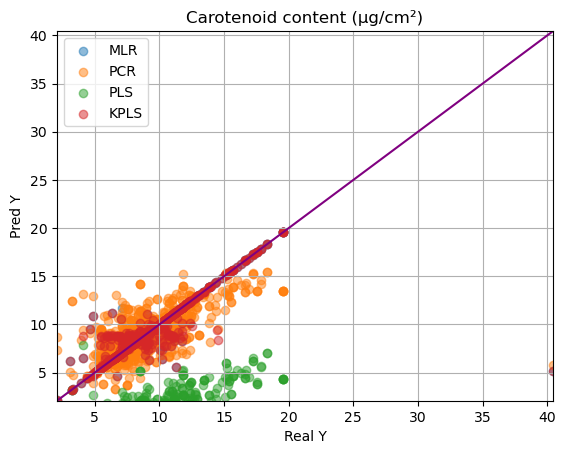

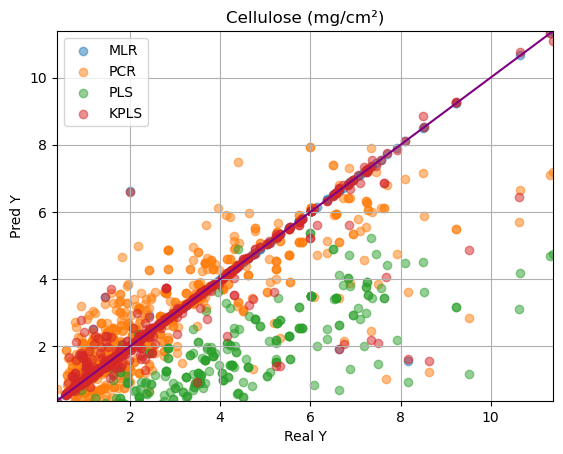

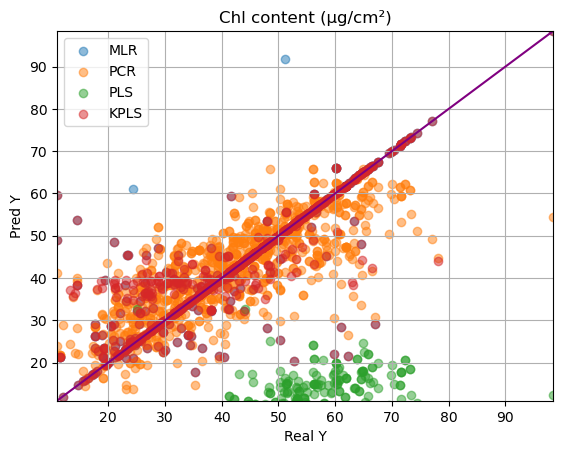

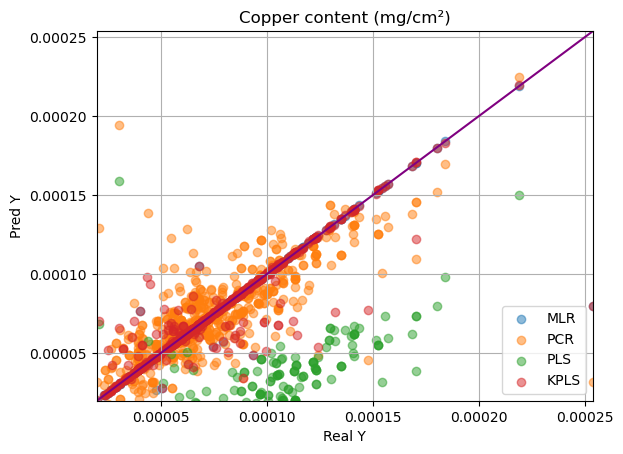

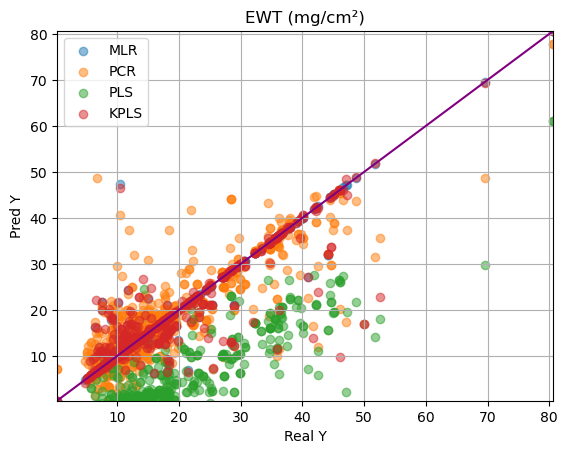

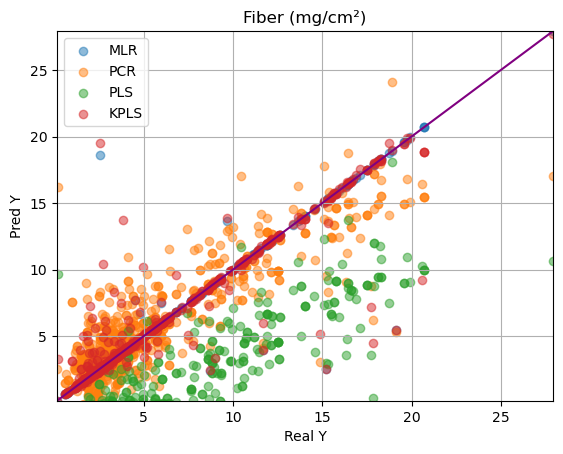

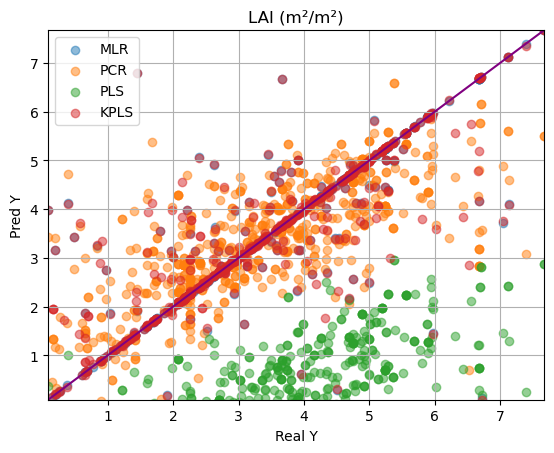

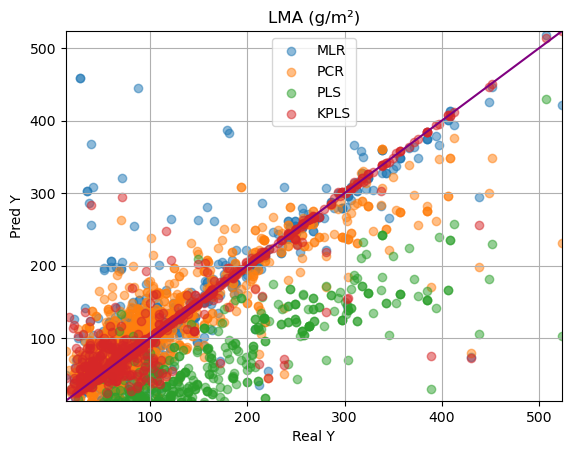

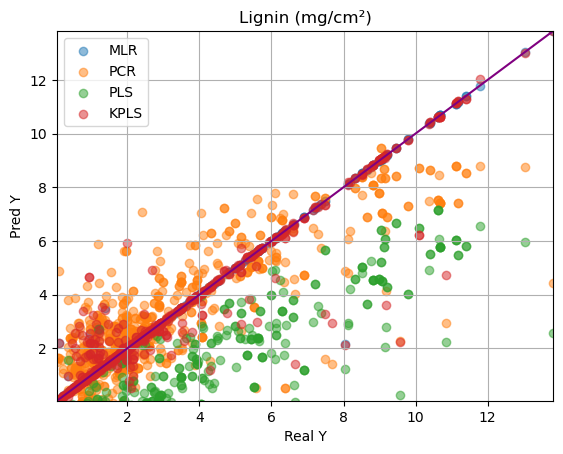

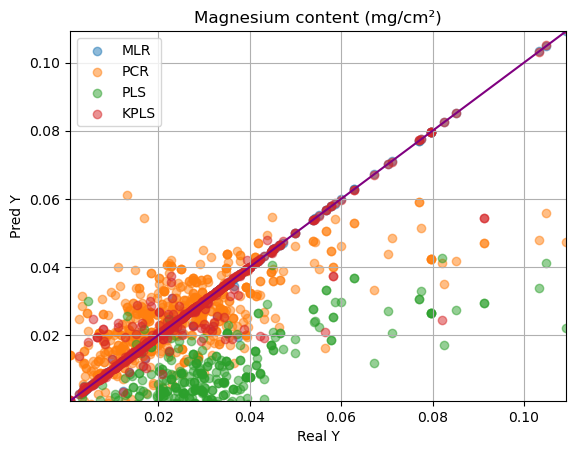

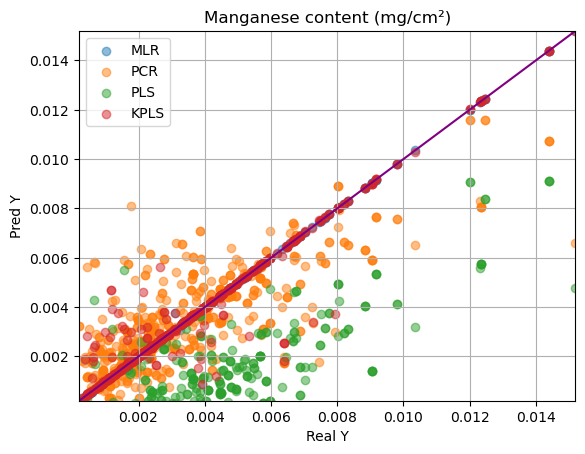

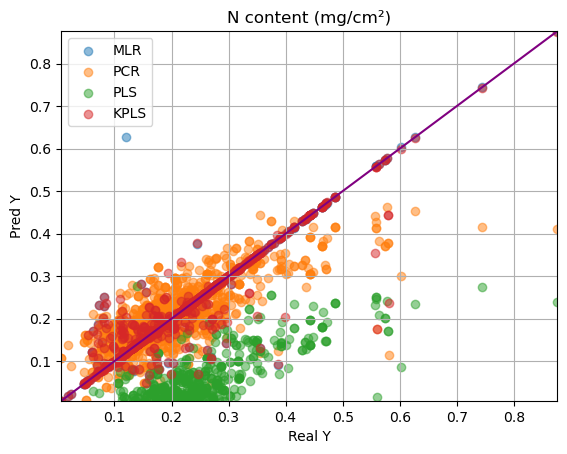

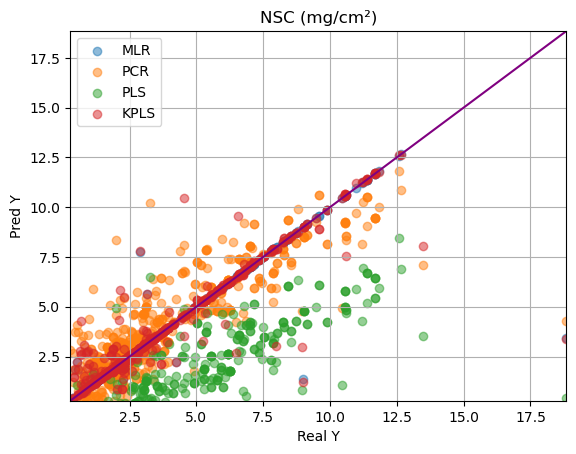

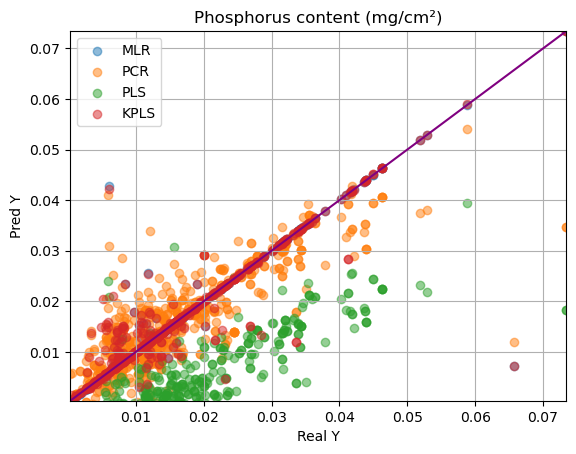

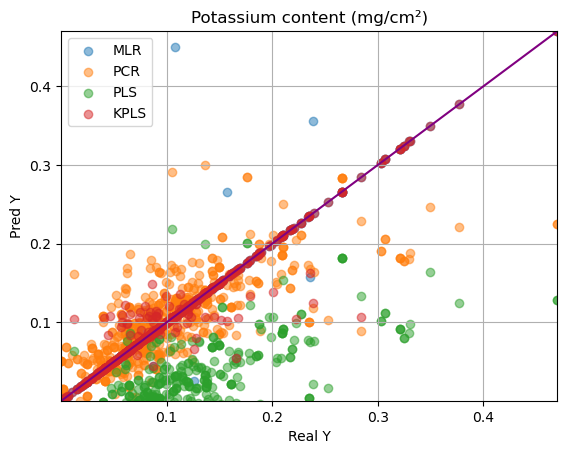

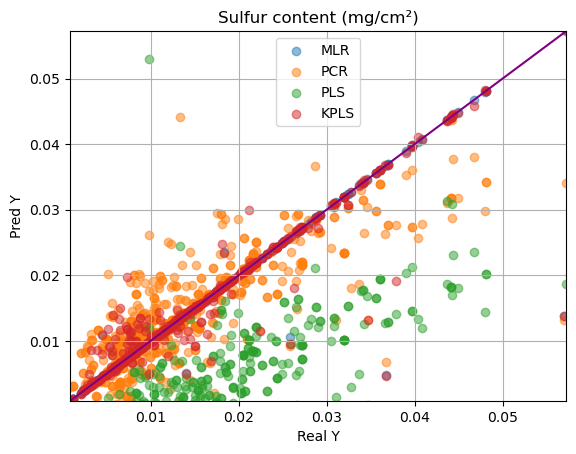

In [39]:
# Comparing the point clouds

for trait in range(len(target_cols)):
    plt.scatter(test_yl[trait], predictions_MLR[trait], label='MLR', alpha=0.5)
    plt.scatter(test_yl[trait], predictions_PCR[trait], label='PCR', alpha=0.5)
    plt.scatter(test_yl[trait], predictions_PLS[trait], label='PLS', alpha=0.5)
    plt.scatter(test_yl[trait], predictions_KPLS[trait], label='KPLS', alpha=0.5)
    
    plt.plot([test_yl[trait].min(), test_yl[trait].max()], [test_yl[trait].min(), test_yl[trait].max()], c='Purple')
    plt.ylim(test_yl[trait].min(), test_yl[trait].max())
    plt.xlim(test_yl[trait].min(), test_yl[trait].max())
    plt.grid()
    plt.legend()
    plt.xlabel("Real Y")
    plt.ylabel("Pred Y")
    plt.title(target_cols[trait])
    plt.show()

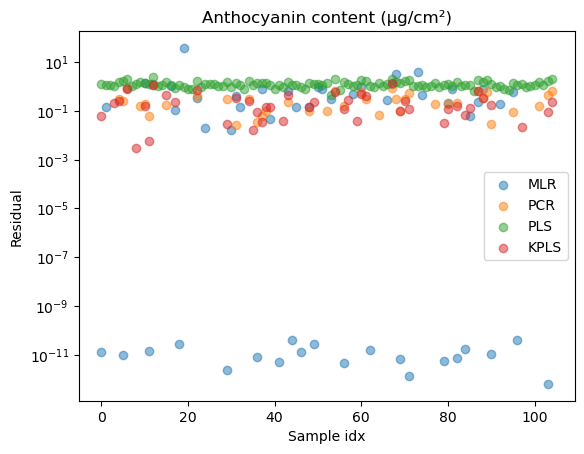

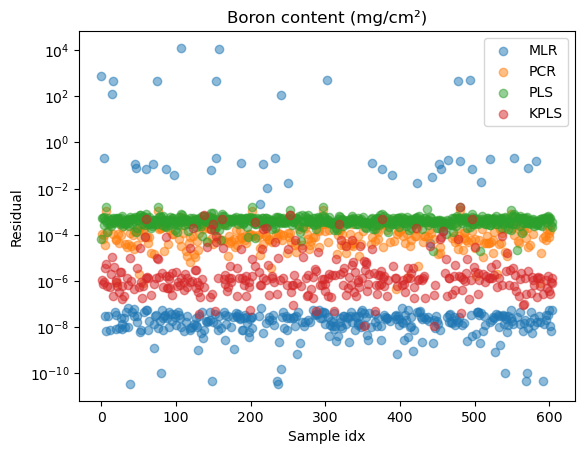

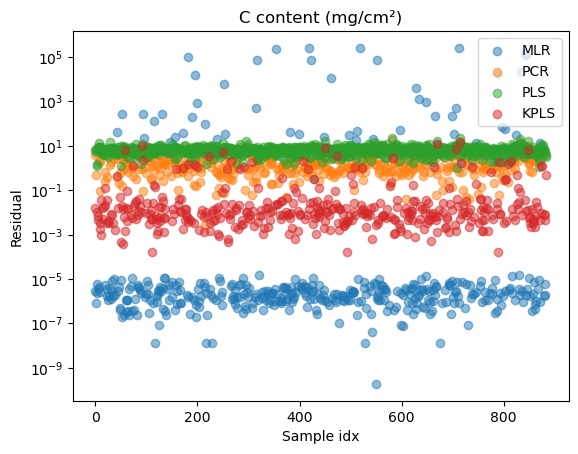

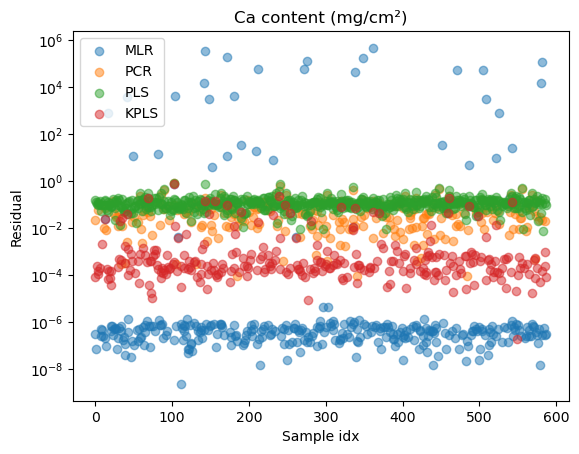

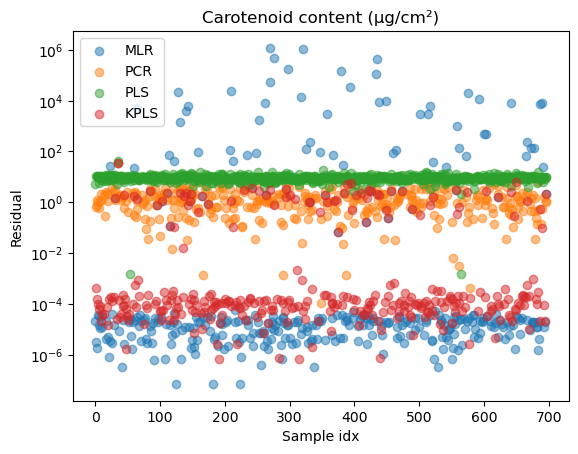

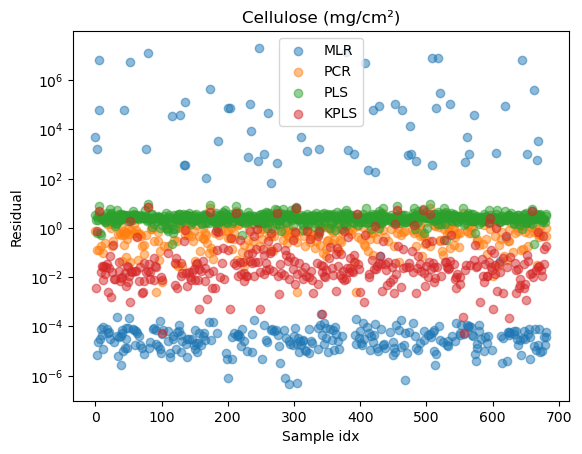

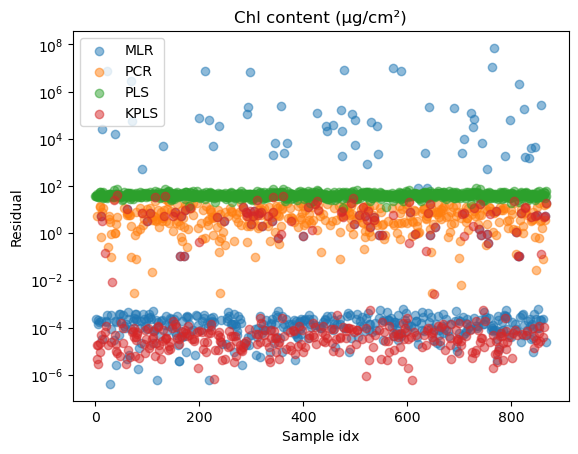

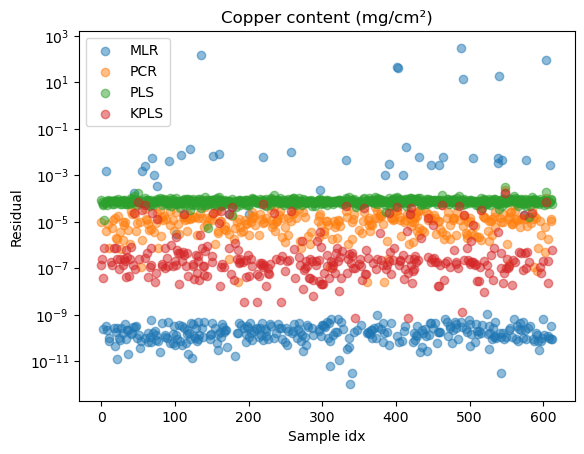

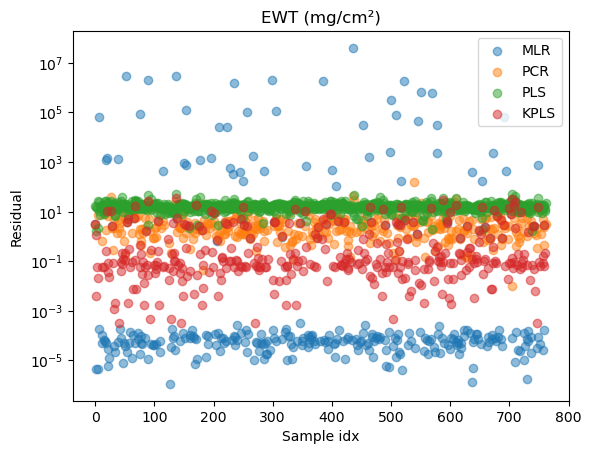

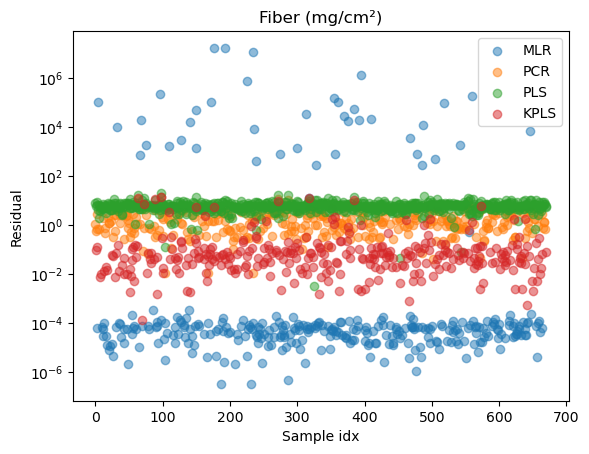

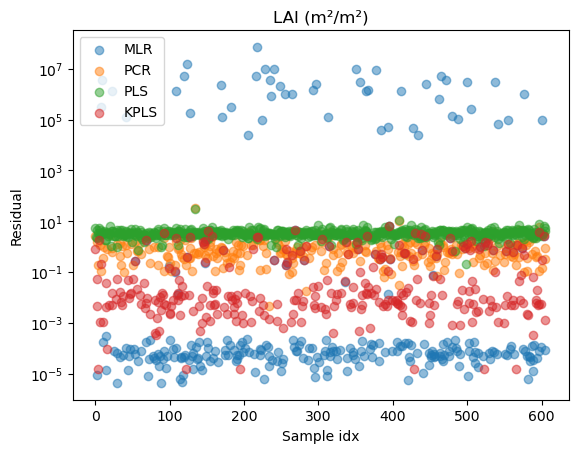

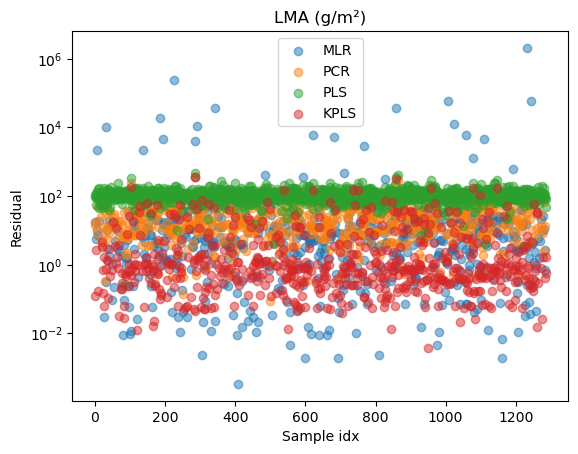

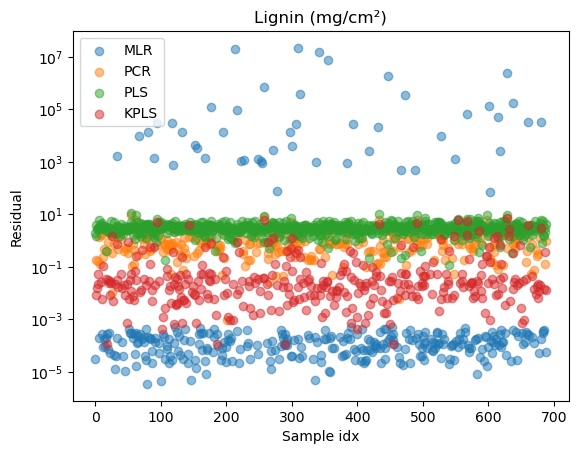

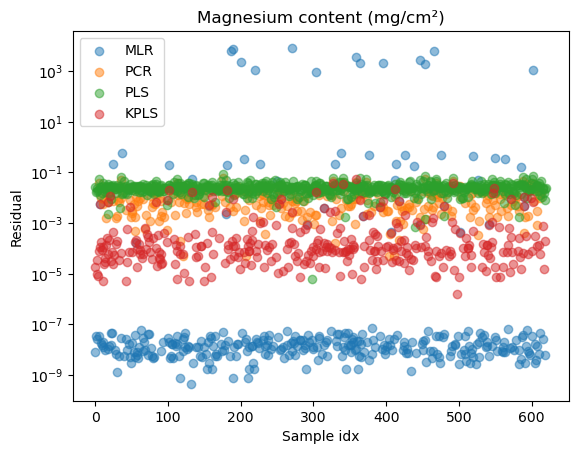

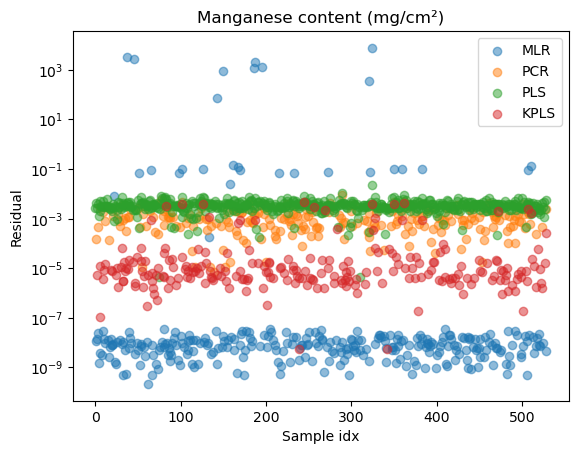

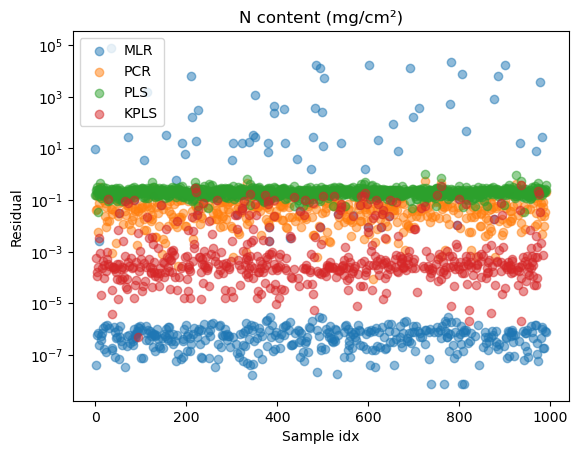

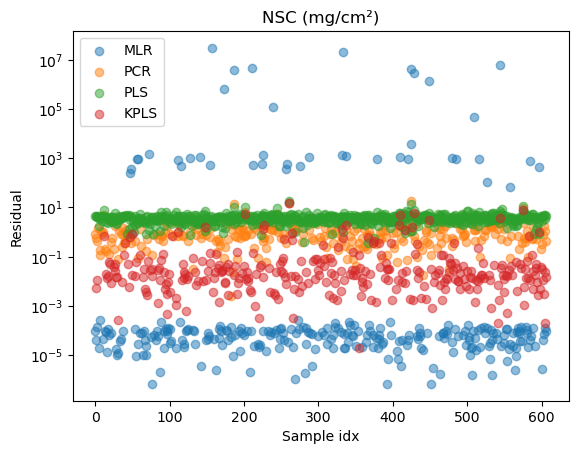

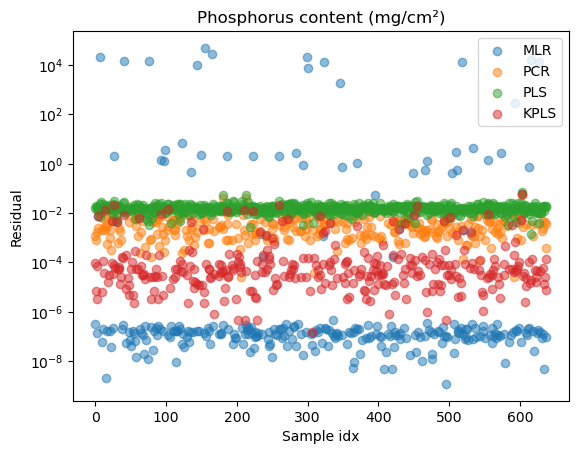

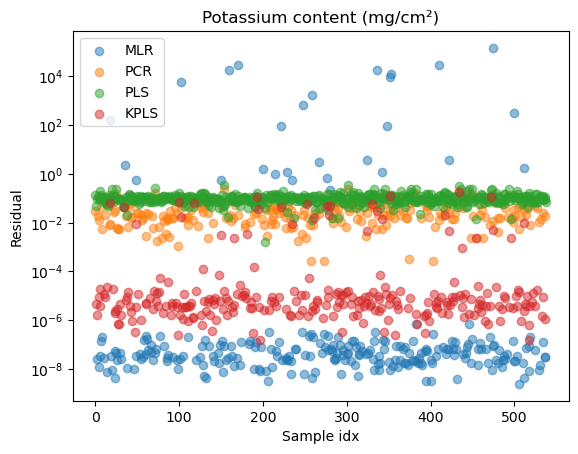

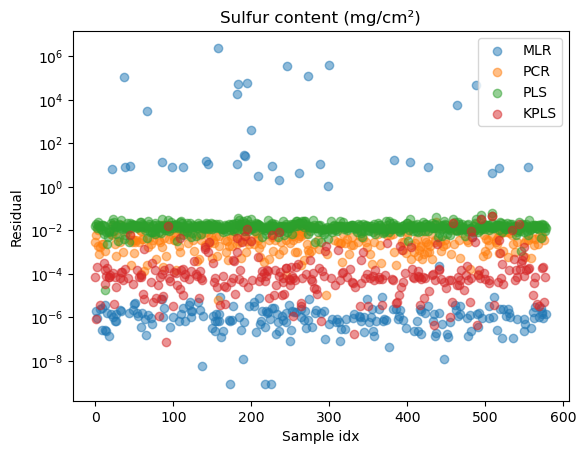

In [40]:
# Plotting residuals

# Comparing the point clouds

for trait in range(len(target_cols)):
    x_range = np.arange(len(test_yl[trait]))
    plt.scatter(x_range, test_yl[trait] - predictions_MLR[trait], label='MLR', alpha=0.5)
    plt.scatter(x_range, test_yl[trait] - predictions_PCR[trait], label='PCR', alpha=0.5)
    plt.scatter(x_range, test_yl[trait] - predictions_PLS[trait].flatten(), label='PLS', alpha=0.5)
    plt.scatter(x_range, test_yl[trait] - predictions_KPLS[trait].flatten(), label='KPLS', alpha=0.5)
    
    plt.legend()
    plt.xlabel("Sample idx")
    plt.ylabel("Residual")
    plt.yscale('log')
    plt.title(target_cols[trait])
    plt.show()